In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [4]:
sys.path.append('/home/rthedin/a2e-mmc')
from mmctools.plotting import plot_profile

# Testing and post processing
by Regis Thedin
(mostly for learning and getting confortable with pandas)

This notebook uses data processed in the previous notebooks written by Eliot.

In [5]:
# load the data
output_dir = 'data'
fig_dir = 'fig'
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

tsdata = 'WTK_ts.calc.csv.gz'
columndata = 'WTK.calc.csv.gz'

dfts_plain = pd.read_csv(os.path.join(output_dir,tsdata))
dfcd_plain = pd.read_csv(os.path.join(output_dir,columndata))

In [6]:
print("This is the columndata: \n", dfcd_plain, "\n\n")
dfcd_date = pd.read_csv(os.path.join(output_dir,columndata),parse_dates=['datetime'])
dfcd = dfcd_date.set_index('datetime')
display("This is the columndata with parse dates and set index datetime", dfcd.head())
print("\n\n")
dfcd = dfcd_date.set_index(['datetime','height'])
display("This is the columndata with parse dates and set index datetime and height", dfcd.head())
print("\n\n")



This is the columndata: 
                    datetime  height      pressure  temperature  winddirection  \
0       2011-01-01 00:00:00     2.0  82498.458594   255.697800            NaN   
1       2011-01-01 00:00:00    10.0  82410.199219   255.481125     299.963379   
2       2011-01-01 00:00:00    40.0  82079.226562   255.139313     300.045776   
3       2011-01-01 00:00:00    60.0  81858.578125   254.940948     299.974365   
4       2011-01-01 00:00:00    80.0  81637.929688   254.760895     299.842529   
...                     ...     ...           ...          ...            ...   
263035  2013-12-31 23:00:00   100.0  82039.859375   275.119781     266.311218   
263036  2013-12-31 23:00:00   120.0  81839.168750   275.046539     265.816833   
263037  2013-12-31 23:00:00   140.0  81638.478125   274.948883     265.410339   
263038  2013-12-31 23:00:00   160.0  81437.787500   274.842072     265.185089   
263039  2013-12-31 23:00:00   200.0  81036.406250   274.631500     265.196075   

 

'This is the columndata with parse dates and set index datetime'

,height,pressure,temperature,winddirection,windspeed,density,thetav
datetime,,,,,,,
2011-01-01,2.0,82498.458594,255.697800,NaN,NaN,1.123574,255.856046
2011-01-01,10.0,82410.199219,255.481125,299.963379,8.313240,1.123335,255.716036
2011-01-01,40.0,82079.226562,255.139313,300.045776,9.454636,1.120337,255.667990
2011-01-01,60.0,81858.578125,254.940948,299.974365,9.753716,1.118203,255.666316
2011-01-01,80.0,81637.929688,254.760895,299.842529,9.961243,1.115984,255.683616


'This is the columndata with parse dates and set index datetime and height'

pressure  temperature  winddirection  windspeed  \
datetime   height                                                        
2011-01-01 2.0     82498.458594   255.697800            NaN        NaN   
           10.0    82410.199219   255.481125     299.963379   8.313240   
           40.0    82079.226562   255.139313     300.045776   9.454636   
           60.0    81858.578125   254.940948     299.974365   9.753716   
           80.0    81637.929688   254.760895     299.842529   9.961243   

                    density      thetav  
datetime   height                        
2011-01-01 2.0     1.123574  255.856046  
           10.0    1.123335  255.716036  
           40.0    1.120337  255.667990  
           60.0    1.118203  255.666316  
           80.0    1.115984  255.683616

In [7]:
time=dfcd.index.levels[0]
height = dfcd.index.levels[1]
display(time)
display(height)

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2013-12-31 14:00:00', '2013-12-31 15:00:00',
               '2013-12-31 16:00:00', '2013-12-31 17:00:00',
               '2013-12-31 18:00:00', '2013-12-31 19:00:00',
               '2013-12-31 20:00:00', '2013-12-31 21:00:00',
               '2013-12-31 22:00:00', '2013-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=26304, freq=None)

Float64Index([2.0, 10.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 200.0], dtype='float64', name='height')

In [8]:
# ts = pd.read_csv(os.path.join(output_dir, tsdata),parse_dates=['datetime'])
# display(ts)
# tsnew = ts.set_index('datetime')
# display(tsnew)
# The lines above are equivalent to the one below
dfts=pd.read_csv(os.path.join(output_dir, tsdata),parse_dates=['datetime'],index_col=0)
display(dfts)


,z/L,RH,precipitationrate,GHI,pressure,z0,u*,hfx,Ri
datetime,,,,,,,,,
2011-01-01 00:00:00,-0.005493,76.10568,0.732422,0.000000,82520.523438,0.01,0.488319,23.511533,-0.042421
2011-01-01 01:00:00,-0.007324,76.53035,0.732422,0.000000,82549.820312,0.01,0.440878,23.079022,-0.047499
2011-01-01 02:00:00,-0.006714,74.86862,0.366211,0.000000,82559.890625,0.01,0.440988,21.174711,-0.017757
2011-01-01 03:00:00,-0.006714,76.02008,0.000000,0.000000,82550.734375,0.01,0.407729,16.734850,-0.018796
2011-01-01 04:00:00,-0.010987,79.47447,0.732422,0.000000,82562.640625,0.01,0.377586,21.750063,-0.031577
...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,0.000000,62.54158,0.000000,416.234300,83182.468750,0.01,0.457352,-0.000000,0.007969
2013-12-31 20:00:00,0.000610,62.24784,0.000000,397.488300,83128.453125,0.01,0.681897,-7.170460,0.017145
2013-12-31 21:00:00,0.001831,65.35982,0.000000,306.459230,83132.117188,0.01,0.677749,-21.124570,0.029779


In [9]:
monthRange_names = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
fulldate = dfcd.index.get_level_values('datetime')
display(fulldate)
month = fulldate.month
dayOfMonth = fulldate.day
timeOfDay = fulldate.hour

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 00:00:00',
               '2011-01-01 00:00:00', '2011-01-01 00:00:00',
               '2011-01-01 00:00:00', '2011-01-01 00:00:00',
               '2011-01-01 00:00:00', '2011-01-01 00:00:00',
               '2011-01-01 00:00:00', '2011-01-01 00:00:00',
               ...
               '2013-12-31 23:00:00', '2013-12-31 23:00:00',
               '2013-12-31 23:00:00', '2013-12-31 23:00:00',
               '2013-12-31 23:00:00', '2013-12-31 23:00:00',
               '2013-12-31 23:00:00', '2013-12-31 23:00:00',
               '2013-12-31 23:00:00', '2013-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=263040, freq=None)

In [10]:
seasonaldata = {
    'spring': dfcd.loc[(month >= 3) & (month <= 5),:],
    'summer': dfcd.loc[(month >= 6) & (month <= 8),:],
    'fall': dfcd.loc[(month >= 9) & (month <= 11),:],
    'winter': dfcd.loc[(month == 12) | (month <= 2),:],
}
#display(seasonaldata)

In [11]:
hourlydata = {
    '0'  : dfcd.loc[ (timeOfDay >= 0) & (timeOfDay< 1),  :],
    '1'  : dfcd.loc[ (timeOfDay >= 1) & (timeOfDay< 2),  :],
    '2'  : dfcd.loc[ (timeOfDay >= 2) & (timeOfDay< 3),  :],
    '3'  : dfcd.loc[ (timeOfDay >= 3) & (timeOfDay< 4),  :],
    '4'  : dfcd.loc[ (timeOfDay >= 4) & (timeOfDay< 5),  :],
    '5'  : dfcd.loc[ (timeOfDay >= 5) & (timeOfDay< 6),  :],
    '6'  : dfcd.loc[ (timeOfDay >= 6) & (timeOfDay< 7),  :],
    '7'  : dfcd.loc[ (timeOfDay >= 7) & (timeOfDay< 8),  :],
    '8'  : dfcd.loc[ (timeOfDay >= 8) & (timeOfDay< 9),  :],
    '9'  : dfcd.loc[ (timeOfDay >= 9) & (timeOfDay< 10), :],
    '10' : dfcd.loc[ (timeOfDay >= 10) & (timeOfDay<11), :],
    '11' : dfcd.loc[ (timeOfDay >= 11) & (timeOfDay<12), :],
    '12' : dfcd.loc[ (timeOfDay >= 12) & (timeOfDay<13), :],
    '13' : dfcd.loc[ (timeOfDay >= 13) & (timeOfDay<14), :],
    '14' : dfcd.loc[ (timeOfDay >= 14) & (timeOfDay<15), :],
    '15' : dfcd.loc[ (timeOfDay >= 15) & (timeOfDay<16), :],
    '16' : dfcd.loc[ (timeOfDay >= 16) & (timeOfDay<17), :],
    '17' : dfcd.loc[ (timeOfDay >= 17) & (timeOfDay<18), :],
    '18' : dfcd.loc[ (timeOfDay >= 18) & (timeOfDay<19), :],
    '19' : dfcd.loc[ (timeOfDay >= 19) & (timeOfDay<20), :],
    '20' : dfcd.loc[ (timeOfDay >= 20) & (timeOfDay<21), :],
    '21' : dfcd.loc[ (timeOfDay >= 21) & (timeOfDay<22), :],
    '22' : dfcd.loc[ (timeOfDay >= 22) & (timeOfDay<23), :],
    '23' : dfcd.loc[ (timeOfDay >= 23),  :],
}
display(hourlydata)

{'0':                        pressure  temperature  winddirection  windspeed  \
 datetime   height                                                        
 2011-01-01 2.0     82498.458594   255.697800            NaN        NaN   
            10.0    82410.199219   255.481125     299.963379   8.313240   
            40.0    82079.226562   255.139313     300.045776   9.454636   
            60.0    81858.578125   254.940948     299.974365   9.753716   
            80.0    81637.929688   254.760895     299.842529   9.961243   
 ...                         ...          ...            ...        ...   
 2013-12-31 100.0   82530.593750   271.036407     251.155121  16.159554   
            120.0   82325.509375   270.996735     251.226532  16.428116   
            140.0   82120.425000   270.920441     251.528671  16.479996   
            160.0   81915.340625   270.819733     252.023071  16.385391   
            200.0   81505.171875   270.587799     253.231598  16.034424   
 
                  

In [12]:
# Classification of stability (from Eliot's notebook)
Lranges = np.array([-1,-50, -200, -500, 500, 200, 50, 1])
zL_ranges = 2.0 / Lranges
zL_range_names = ['VU','U','NU','N','NS','S','VS']

inrange = (dfts['z/L'] >= zL_ranges[0]) & (dfts['z/L'] <= zL_ranges[-1])
display(inrange)
Noutliers = np.count_nonzero(~inrange)

dfts['stability_zL'] = pd.cut(dfts['z/L'], bins=zL_ranges, labels=zL_range_names)
zL_ranges


datetime
2011-01-01 00:00:00    True
2011-01-01 01:00:00    True
2011-01-01 02:00:00    True
2011-01-01 03:00:00    True
2011-01-01 04:00:00    True
                       ... 
2013-12-31 19:00:00    True
2013-12-31 20:00:00    True
2013-12-31 21:00:00    True
2013-12-31 22:00:00    True
2013-12-31 23:00:00    True
Name: z/L, Length: 26304, dtype: bool

array([-2.   , -0.04 , -0.01 , -0.004,  0.004,  0.01 ,  0.04 ,  2.   ])

In [13]:
print(dfts.columns.values)

['z/L' 'RH' 'precipitationrate' 'GHI' 'pressure' 'z0' 'u*' 'hfx' 'Ri'
 'stability_zL']


In [14]:
dfts.head()

,z/L,RH,precipitationrate,GHI,pressure,z0,u*,hfx,Ri,stability_zL
datetime,,,,,,,,,,
2011-01-01 00:00:00,-0.005493,76.10568,0.732422,0.0,82520.523438,0.01,0.488319,23.511533,-0.042421,NU
2011-01-01 01:00:00,-0.007324,76.53035,0.732422,0.0,82549.820312,0.01,0.440878,23.079022,-0.047499,NU
2011-01-01 02:00:00,-0.006714,74.86862,0.366211,0.0,82559.890625,0.01,0.440988,21.174711,-0.017757,NU
2011-01-01 03:00:00,-0.006714,76.02008,0.000000,0.0,82550.734375,0.01,0.407729,16.734850,-0.018796,NU
2011-01-01 04:00:00,-0.010987,79.47447,0.732422,0.0,82562.640625,0.01,0.377586,21.750063,-0.031577,U


CPU times: user 2min 46s, sys: 280 ms, total: 2min 47s
Wall time: 2min 47s


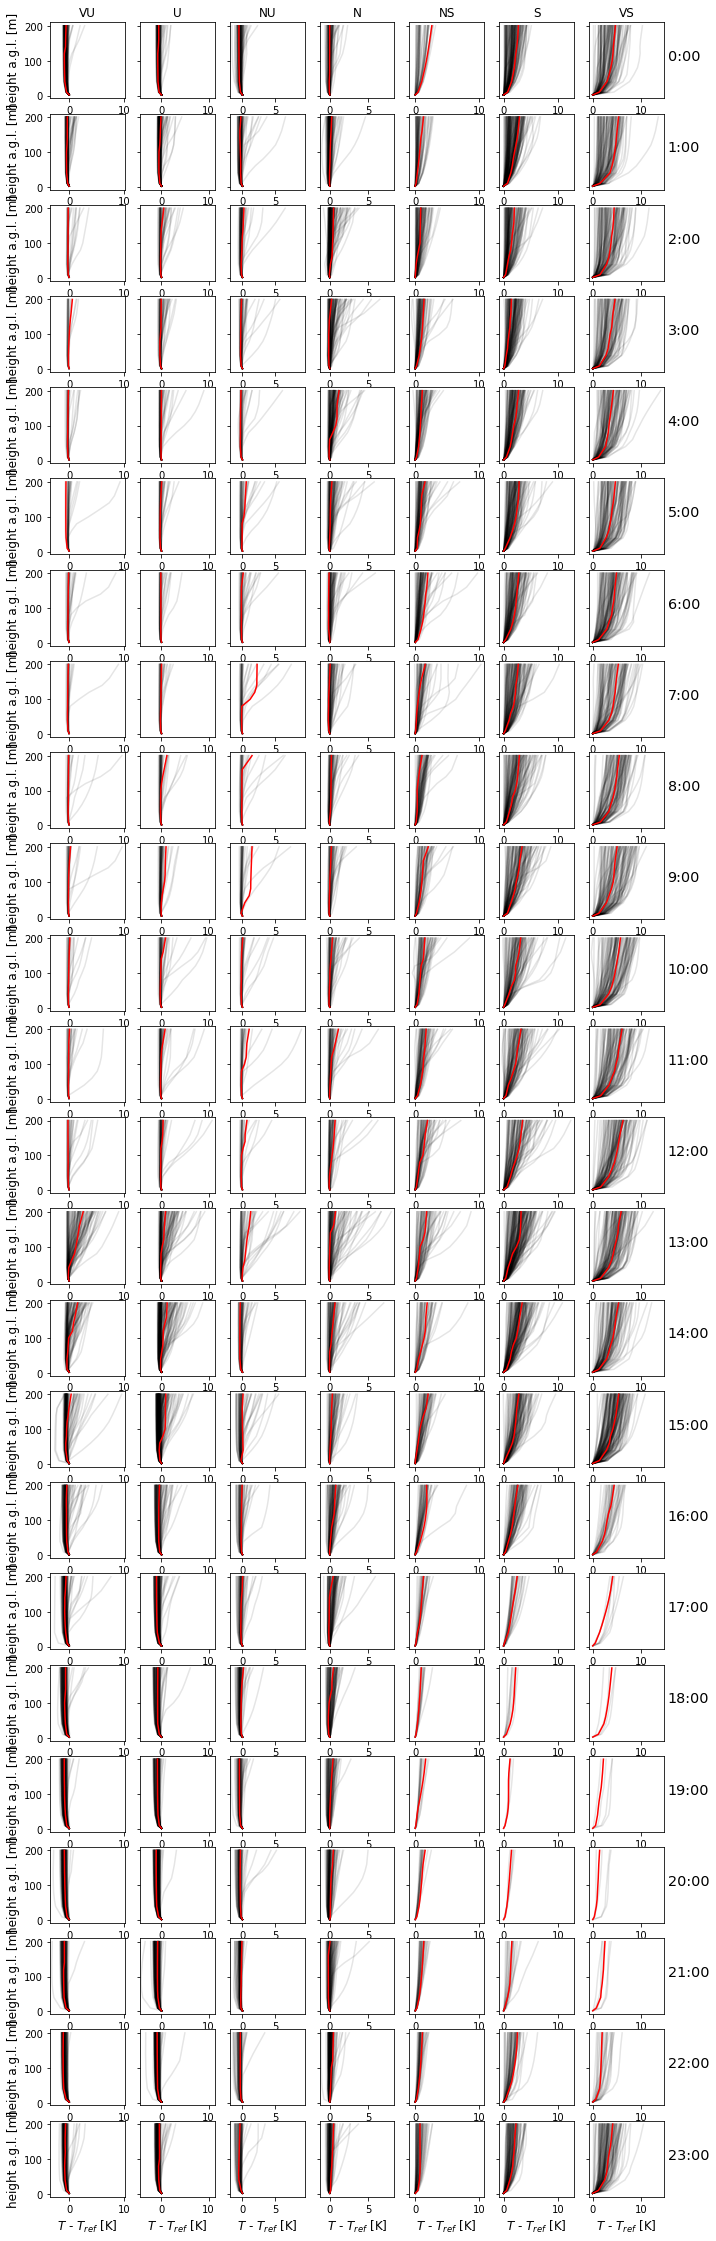

In [15]:
%%time
zref=2

fig,ax = plt.subplots(nrows=24,ncols=7,sharey=True,figsize=(11,40))
Nplot = 100 # approx num of profiles to plot per panel

for irow,val in enumerate(hourlydata.items()):
    hour = val[0]
    data = val[1]
    dates=data.index.levels[0]
    #print("row", irow ,", hour ",hour)
    for icol,stab in enumerate(zL_range_names):
        temp = data.unstack().loc[dfts['stability_zL']==stab,:]
        #day = data.unstack().dfts['datetime']
        #print("Hour:",hour, "  data shape:",data.shape, "temp shape:", temp.shape, "  stab:",stab, " day:",)
        median = temp['thetav'].median(axis=0)
        median -= median.loc[zref]
        N = len(temp)
        if N>100:
            temp = temp['thetav'].iloc[slice(0,N,int(N/Nplot))]
        else:
            temp = temp['thetav']
        for datetime,profile in temp.iterrows():
            Ttop = profile.loc[zref]
            profile -= Ttop
            ax[irow,icol].plot(profile, profile.index, color='k', alpha=0.1)
        ax[irow,icol].plot(median, median.index, color='r')
    ax[irow,-1].text(1.05, 0.5, f"{hour}:00", fontdict={'fontsize':'x-large'}, transform=ax[irow,-1].transAxes)
    
# make xaxis ranges in each column consistent
for icol in range(len(zL_range_names)):
    allminmax = np.stack([np.array(axi.get_xlim()) for axi in ax[:,icol]])
    minmax = (np.min(allminmax[:,0]), np.max(allminmax[:,1]))
    for axi in ax[:,icol]:
        axi.set_xlim(minmax)
        
# set labels
for axi in ax[-1,:]:
    axi.set_xlabel('$T$ - $T_{ref}$ [K]',fontsize='large')
for axi in ax[:,0]:
    axi.set_ylabel('height a.g.l. [m]',fontsize='large')
for i,axi in enumerate(ax[0,:]):
    axi.set_title(zL_range_names[i])
    

/home/rthedin/.conda-envs/myenv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/rthedin/.conda-envs/myenv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


CPU times: user 2min 31s, sys: 399 ms, total: 2min 31s
Wall time: 2min 31s


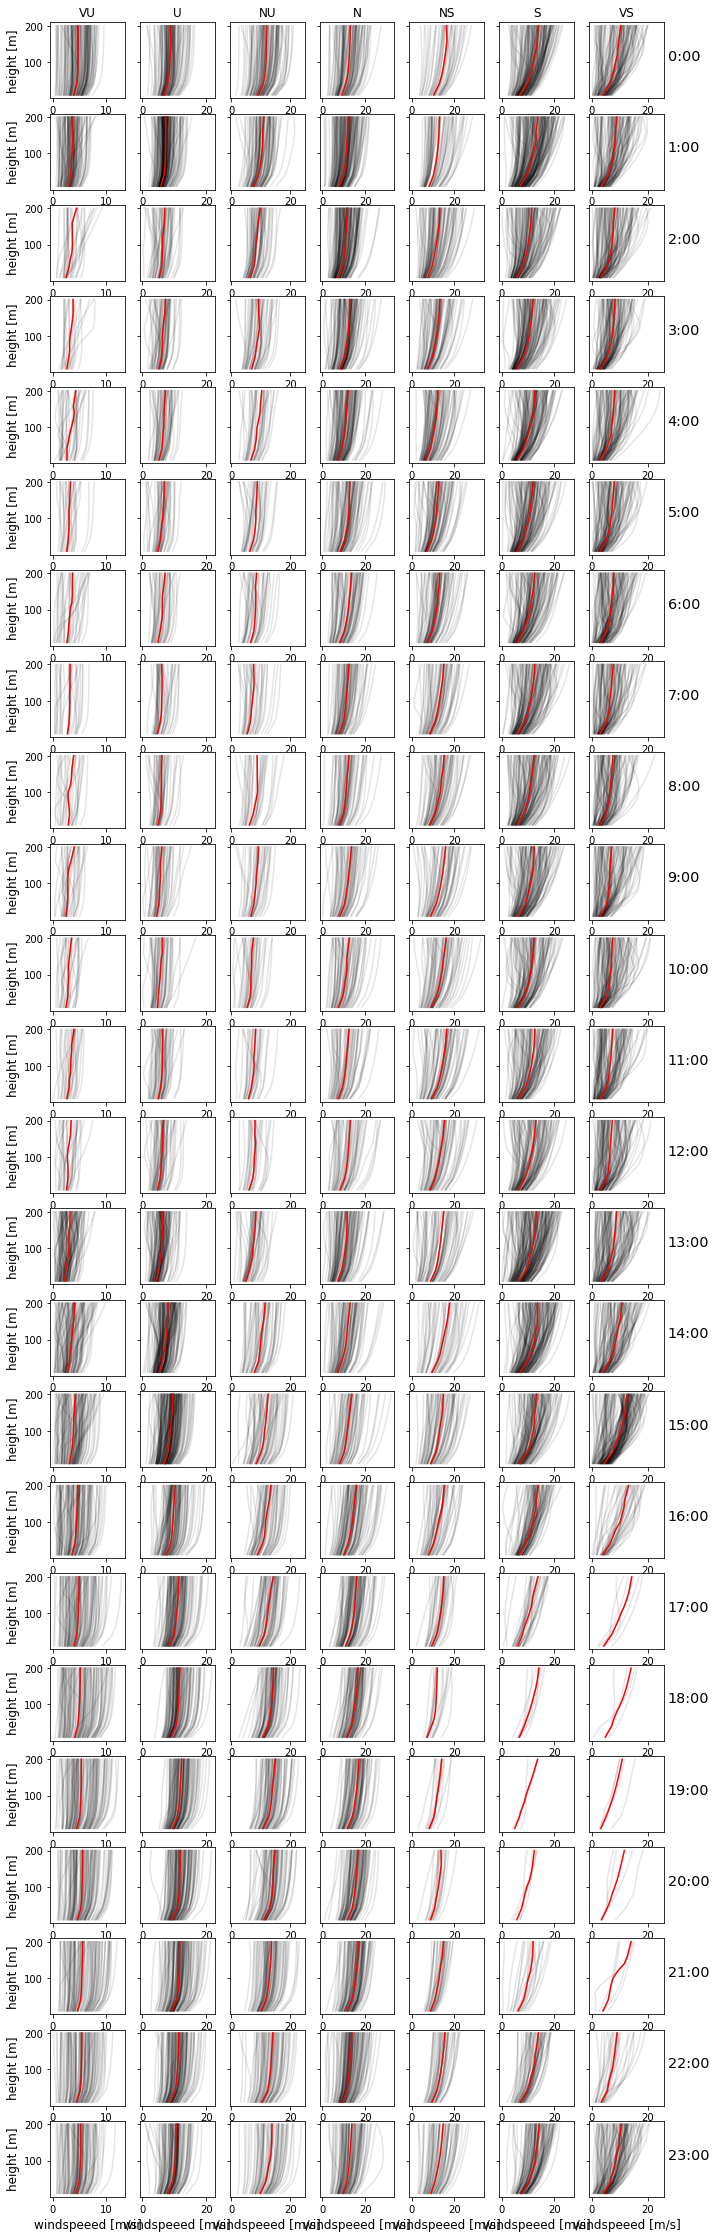

In [16]:
%%time
zref=2

fig,ax = plt.subplots(nrows=24,ncols=7,sharey=True,figsize=(11,40))
Nplot = 100 # approx num of profiles to plot per panel

for irow,val in enumerate(hourlydata.items()):
    hour = val[0]
    data = val[1]
    dates=data.index.levels[0]
    #print("row", irow ,", hour ",hour)
    for icol,stab in enumerate(zL_range_names):
        temp = data.unstack().loc[dfts['stability_zL']==stab,:]
        #day = data.unstack().dfts['datetime']
        #print("Hour:",hour, "  data shape:",data.shape, "temp shape:", temp.shape, "  stab:",stab, " day:",)
        median = temp['windspeed'].median(axis=0)
        #median -= median.loc[zref]
        N = len(temp)
        if N>100:
            temp = temp['windspeed'].iloc[slice(0,N,int(N/Nplot))]
        else:
            temp = temp['windspeed']
        for datetime,profile in temp.iterrows():
            #Ttop = profile.loc[zref]
            #profile -= Ttop
            ax[irow,icol].plot(profile, profile.index, color='k', alpha=0.1)
        ax[irow,icol].plot(median, median.index, color='r')
    ax[irow,-1].text(1.05, 0.5, f"{hour}:00", fontdict={'fontsize':'x-large'}, transform=ax[irow,-1].transAxes)
    
# make xaxis ranges in each column consistent
for icol in range(len(zL_range_names)):
    allminmax = np.stack([np.array(axi.get_xlim()) for axi in ax[:,icol]])
    minmax = (np.min(allminmax[:,0]), np.max(allminmax[:,1]))
    for axi in ax[:,icol]:
        axi.set_xlim(minmax)
        
# set labels
for axi in ax[-1,:]:
    axi.set_xlabel('windspeeed [m/s]',fontsize='large')
for axi in ax[:,0]:
    axi.set_ylabel('height [m]',fontsize='large')
for i,axi in enumerate(ax[0,:]):
    axi.set_title(zL_range_names[i])
    

In [17]:
dfcdh = dfcd.assign(hour = dfcd.index.get_level_values('datetime').hour)
display(dfcdh)

pressure  temperature  winddirection  \
datetime            height                                             
2011-01-01 00:00:00 2.0     82498.458594   255.697800            NaN   
                    10.0    82410.199219   255.481125     299.963379   
                    40.0    82079.226562   255.139313     300.045776   
                    60.0    81858.578125   254.940948     299.974365   
                    80.0    81637.929688   254.760895     299.842529   
...                                  ...          ...            ...   
2013-12-31 23:00:00 100.0   82039.859375   275.119781     266.311218   
                    120.0   81839.168750   275.046539     265.816833   
                    140.0   81638.478125   274.948883     265.410339   
                    160.0   81437.787500   274.842072     265.185089   
                    200.0   81036.406250   274.631500     265.196075   

                            windspeed   density      thetav  hour  
datetime            height                                         
2011-01-01 00:00:00 2.0           NaN  1.123574  255.856046     0  
                    10.0     8.313240  1.123335  255.716036     0  
                    40.0     9.454636  1.120337  255.667990     0  
                    60.0     9.753716  1.118203  255.666316     0  
                    80.0     9.961243  1.115984  255.683616     0  
...                               ...       ...         ...   ...  
2013-12-31 23:00:00 100.0   14.255196  1.036712  276.767305    23  
                    120.0   14.642784  1.034458  276.894805    23  
                    140.0   14.902191  1.032298  276.997152    23  
                    160.0   15.076141  1.030172  277.090388    23  
                    200.0   15.289772  1.025904  277.281734    23  

[263040 rows x 7 columns]

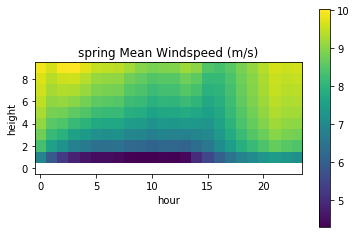

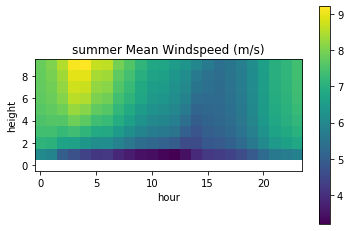

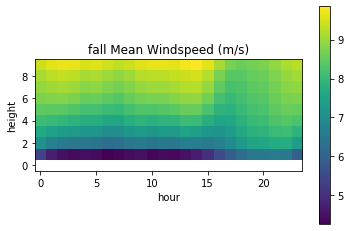

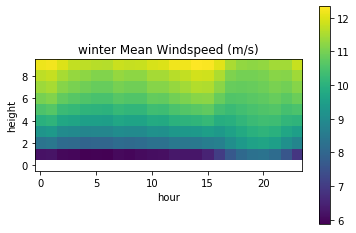

In [18]:

hours_unique = pd.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
heights_unique = pd.array([2,10,40,60,80,100,120,140,160,200])

for irow,(season,data) in enumerate(seasonaldata.items()): 
    data = data.assign(hour = data.index.get_level_values('datetime').hour)

    d_ri = data.reset_index()
    height = d_ri['height']
    hour = d_ri['hour']
    ws = np.zeros(shape=(len(heights_unique),len(hours_unique)))
    
    for (i,z) in enumerate(heights_unique):
        for (j,h) in enumerate(hours_unique):
            #print("Hour ", h, ", height ",z)
            d = data.reset_index().loc[(hour==h) & (height==z)]
            #print(d)#['windspeed'].mean())
            #print("i is",i," and j is",j)
            ws[i,j] = d['windspeed'].mean()
            
    plt.imshow(ws,origin='lower')
    plt.xlabel("hour")
    plt.ylabel("height")
    #plt.set_yticklabels(heights_unique)
    plt.title(f"{season} Mean Windspeed (m/s)")
    plt.colorbar()
    plt.show()     